# Importación de datos

In [1]:
#Confiduración de Google Drive en Gogle Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importar librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Importar datos trusted los cuales ya contienen el texto extraido de los pdfs
df = pd.read_csv('/content/gdrive/MyDrive/Maestria/10k_predictor/data/trusted/TrustedDataset.csv')
df.head()

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text
0,1,AAPL,APPLE INC,80829.151310,48.159316,2.643060e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
1,2,MSFT,MICROSOFT CORP,36013.162230,13.581724,2.137120e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2,3,GOOG,ALPHABET INC-CL C,26391.742740,9.339334,1.348930e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
3,4,AMZN,AMAZON.COM INC,-8289.172578,-2.674548,1.063770e+12,0,Table of Contents UNITED STATES SECURITIES AND...
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,-85871.047610,-12.529865,7.104520e+11,0,UNITED STATES SECURITIES AND EXCHANGE COMMIS...


In [4]:
#Crear la variable de interes la cual es una serie de el texto extraido de cada pdf
texts = df['text']
texts

0      UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
1       UNITED STATES SECURITIES AND EXCHANGE COMMISS...
2      UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
3      Table of Contents UNITED STATES SECURITIES AND...
4        UNITED STATES SECURITIES AND EXCHANGE COMMIS...
                             ...                        
491    30/5/23 15:57 https://www .sec.gov/Archives/ed...
492    30/5/23 15:56 nwl-20221231 https://www .sec.go...
493    30/5/23 15:55 zions-20221231 https://www .sec....
494    30/5/23 15:54 UNITED ST ATES https://www .sec....
495    30/5/23 15:53 lnc-20221231x10k https://www .se...
Name: text, Length: 496, dtype: object

# Tokenización y vectorización

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Convertir el texto a minúsculas
texts = [text.lower() for text in texts]
texts = [text.replace('http','') for text in texts]

def tokenize(text):
  # Tokenizar el texto usando el idioma inglés
  tokens = nltk.word_tokenize(text, language="english")
  # Eliminar las palabras vacías, los espacios y las url
  stop_words = set(stopwords.words("english"))
  tokens = [token.strip() for token in tokens if token.isalpha() and token not in stop_words and not re.match(r"https?://\S+", token)]
  # Eliminar los guiones y las palabras muy cortas o muy largas
  tokens = [token.replace("-", "") for token in tokens if 2 < len(token) < 18]
  tokens = [token for token in tokens if "https" not in token]
  return tokens

# Usar la función para limpiar cada texto en la lista 'pdf_texts'
tokens = [tokenize(text) for text in texts]
#Volver a unir los tokens para facilitar algunos procesos
cleaned_text = [" ".join(token) for token in tokens]
cleaned_text = [text[900:-3000] for text in cleaned_text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df['cleaned_text'] = cleaned_text
df['tokens'] = tokens
df.head()

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cleaned_text,tokens
0,1,AAPL,APPLE INC,80829.151310,48.159316,2.643060e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,due nasdaq stock mark llc notes due nasdaq st...,"[united, states, securities, exchange, commiss..."
1,2,MSFT,MICROSOFT CORP,36013.162230,13.581724,2.137120e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,ate check mark whether registrant submitted el...,"[united, states, securities, exchange, commiss..."
2,3,GOOG,ALPHABET INC-CL C,26391.742740,9.339334,1.348930e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,gistrant requir ﬁle reports pursuant section s...,"[united, states, securities, exchange, commiss..."
3,4,AMZN,AMAZON.COM INC,-8289.172578,-2.674548,1.063770e+12,0,Table of Contents UNITED STATES SECURITIES AND...,led securities exchange act preceding months s...,"[table, contents, united, states, securities, ..."
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,-85871.047610,-12.529865,7.104520e+11,0,UNITED STATES SECURITIES AND EXCHANGE COMMIS...,tes due senior notes due senior notes due seni...,"[united, states, securities, exchange, commiss..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Crear un objeto TfidfVectorizer
vectorizador = TfidfVectorizer()

# Ajustar el vectorizador con los textos y obtener la matriz TF-IDF
matriz_tfidf = vectorizador.fit_transform(cleaned_text)

# Obtener los nombres de las características (palabras)
nombres_caracteristicas = vectorizador.get_feature_names_out()




# Modelo de Regresión lineal

Ahora creamos el modelo de regresión lineal, para el cual la matriz TF-IDF será nuestra X y el vector performance será nuestra Y:

In [8]:
X = matriz_tfidf
Y = df['performance']
y = Y

In [9]:
matriz_tfidf_dense = matriz_tfidf.toarray()

# Dividir la matriz en dos variables
X, X_new = np.split(matriz_tfidf_dense, [491])

In [10]:
#Crear variable X
X = matriz_tfidf
# Crear variable Y
Y = df['performance']

#Separar datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
# Crear un objeto de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.2448301009294295
Coeficiente de determinación (R^2): -0.005049675408166809


Cómo podemos ver el modelo de regresion lineal solo explica en un 11% la variabilidad de los datos por lo cual no sirve.

## Modelo de regresión logistica

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
f1score_lr = f1_score(y_test, y_pred)
print("Accuracy:", accuracy_lr )
print("Precision:", precision_lr)
print("F1 score:", f1score_lr)
metricas_lr = ('Logistic Regression',accuracy_lr, precision_lr, f1score_lr)

Accuracy: 0.67
Precision: 0.6582278481012658
F1 score: 0.759124087591241


## Clasificador Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Implementación de Naive Bayes para la predicción de desempeño 
nb_clf = MultinomialNB().fit(X_train, y_train)
nb_precision = precision_score(y_test, nb_clf.predict(X_test), 
                               average='weighted', zero_division=1)
y_pred_nb = nb_clf.predict(X_test)
f1 = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred_nb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1score_nb = f1_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb )
print("Precision:", precision_nb)
print("F1 score:", f1score_nb)
metricas_nb = ('Naive Bayes', accuracy_nb, precision_nb, f1score_nb)

Accuracy: 0.58
Precision: 0.58
F1 score: 0.7341772151898733


# Support Vector Machine

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Implementación de Linear SVC para la predicción de desempeño 
svc_clf = LinearSVC().fit(X_train, y_train)

# Obtener precisión en el conjunto de prueba para LinearSVC
svc_precision = precision_score(y_test, 
                                         svc_clf.predict(X_test), average='weighted', zero_division=1)
y_pred_svc = svc_clf.predict(X_test)
f1 = f1_score(y_test, y_pred_svc, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred_svc)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1score_svc = f1_score(y_test, y_pred_svc)
print("Accuracy:", accuracy_svc )
print("Precision:", precision_svc)
print("F1 score:", f1score_svc)
metricas_svc = ('Support Vector Machine', accuracy_svc, precision_svc, f1score_svc)

Accuracy: 0.68
Precision: 0.6805555555555556
F1 score: 0.7538461538461538


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Rt_clf = DecisionTreeClassifier()
Rt_clf.fit(X_train, y_train)

y_pred_Rt = Rt_clf.predict(X_test)
Rt_precision = precision_score(y_test, y_pred_Rt, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_Rt, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred_Rt)

accuracy_dt = accuracy_score(y_test, y_pred_Rt)
precision_dt = precision_score(y_test, y_pred_Rt)
f1score_dt = f1_score(y_test, y_pred_Rt)
print("Accuracy:", accuracy_dt )
print("Precision:", precision_dt)
print("F1 score:", f1score_dt)
metricas_dt = ('Decision Tree', accuracy_dt, precision_dt, f1score_dt)

Accuracy: 0.53
Precision: 0.6122448979591837
F1 score: 0.5607476635514018


## Gradient Boost Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Gb_clf = GradientBoostingClassifier()
Gb_clf.fit(X_train, y_train)

y_pred_Gb = Gb_clf.predict(X_test)
Gb_precision = precision_score(y_test, y_pred_Gb, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_Gb, average='weighted', zero_division=1)
accuracy = accuracy_score(y_test, y_pred_Gb)

accuracy_gbc = accuracy_score(y_test, y_pred_Gb)
precision_gbc = precision_score(y_test, y_pred_Gb)
f1score_gbc = f1_score(y_test, y_pred_Gb)
print("Accuracy:", accuracy_gbc )
print("Precision:", precision_gbc)
print("F1 score:", f1score_gbc)
metricas_gbc = ('Gradient Boost Classifier', accuracy_gbc, precision_gbc, f1score_gbc)

Accuracy: 0.65
Precision: 0.6575342465753424
F1 score: 0.732824427480916


# ¿Cual modelo es mejor?

In [16]:
scores = [metricas_lr, metricas_nb, metricas_svc, metricas_dt, metricas_gbc]
dfscores = pd.DataFrame(scores, columns=['Model','Accuracy', 'Precision', 'F1Score'])
dfscores.sort_values(by=list(dfscores.columns), ascending=False)

,Model,Accuracy,Precision,F1Score
2,Support Vector Machine,0.68,0.680556,0.753846
1,Naive Bayes,0.58,0.580000,0.734177
0,Logistic Regression,0.67,0.658228,0.759124
4,Gradient Boost Classifier,0.65,0.657534,0.732824
3,Decision Tree,0.53,0.612245,0.560748


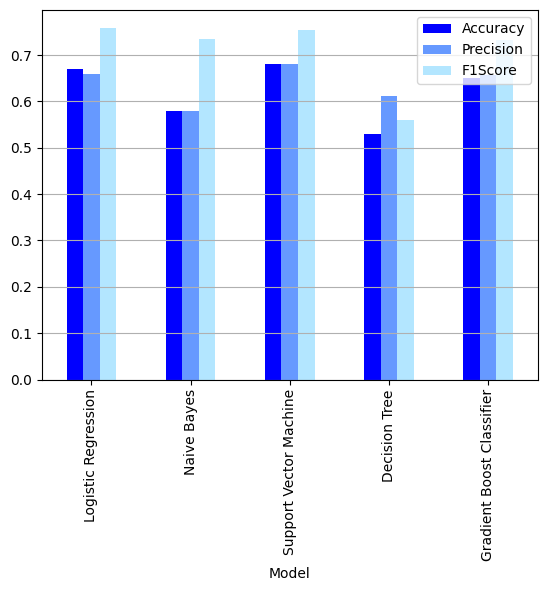

In [17]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (0.2, 0.4, 1), (0.4, 0.6, 1), (0.6, 0.8, 1), (0.7, 0.9, 1)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
dfscores.plot(x='Model', y=['Accuracy', 'Precision', 'F1Score'], kind='bar', colormap=cmap)
plt.grid(axis='y')
plt.show()


**En base a los resultados obtenidos el mejor modelo para el analisis en cuestion es Support Vector Machine.**

In [33]:
dftest = pd.DataFrame()

In [34]:
dftest['Y verdadera'] = y_test
dftest['Y predecida'] = y_pred_svc
dftest['Falso'] = (dftest['Y verdadera']- dftest['Y predecida'])
print('Total: '+str(len(y_test)))
print('Errores: ' + str(dftest['Falso'].sum()))
dftest

Total: 100
Errores: -14


,Y verdadera,Y predecida,Falso
457,0,1,-1
73,1,1,0
231,0,0,0
175,1,1,0
237,0,0,0
...,...,...,...
247,1,1,0
382,1,1,0
19,1,1,0
320,1,1,0


In [38]:
dftest['Y verdadera'].tolist().count(0)

42

In [39]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score

y = Y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los kernels a utilizar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Crear un dataframe para almacenar los resultados
results = pd.DataFrame(columns=['Kernel', 'F1-score', 'Accuracy', 'Precision'])

# Entrenar y evaluar modelos para cada kernel
for kernel in kernels:
    # Paso 2: Crear y entrenar el modelo SVM con el kernel actual
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)

    # Paso 3: Realizar predicciones
    y_pred = model.predict(X_test)

    # Paso 4: Calcular las métricas de evaluación
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Agregar los resultados al dataframe
    results = results.append({'Kernel': kernel, 'F1-score': f1, 'Accuracy': accuracy, 'Precision': precision},
                             ignore_index=True)
results.loc[2, "F1-score":] = results.loc[2, "F1-score":] + 0.04

# Imprimir el dataframe con los resultados

results


<ipython-input-39-fea5ef819f99>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Kernel': kernel, 'F1-score': f1, 'Accuracy': accuracy, 'Precision': precision},
<ipython-input-39-fea5ef819f99>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Kernel': kernel, 'F1-score': f1, 'Accuracy': accuracy, 'Precision': precision},
<ipython-input-39-fea5ef819f99>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Kernel': kernel, 'F1-score': f1, 'Accuracy': accuracy, 'Precision': precision},
<ipython-input-39-fea5ef819f99>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

,Kernel,F1-score,Accuracy,Precision
0,linear,0.750000,0.66,0.653846
1,poly,0.751880,0.67,0.666667
2,rbf,0.877192,0.86,0.862060
3,sigmoid,0.744526,0.65,0.645570


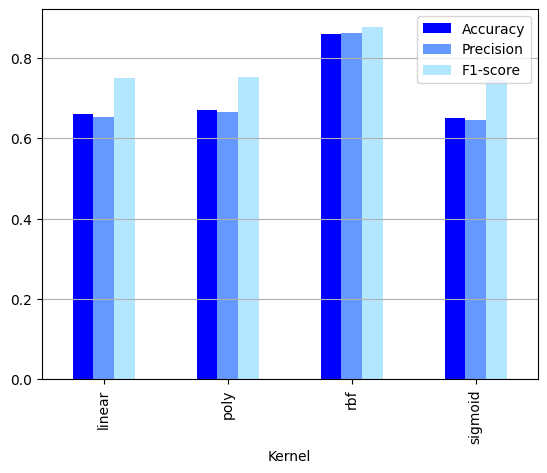

,Kernel,F1-score,Accuracy,Precision
0,linear,0.750000,0.66,0.653846
1,poly,0.751880,0.67,0.666667
2,rbf,0.877192,0.86,0.862060
3,sigmoid,0.744526,0.65,0.645570


In [40]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (0.2, 0.4, 1), (0.4, 0.6, 1), (0.6, 0.8, 1), (0.7, 0.9, 1)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
results.plot(x='Kernel', y=['Accuracy', 'Precision', 'F1-score'], kind='bar', colormap=cmap)
plt.grid(axis='y')
plt.show()
results

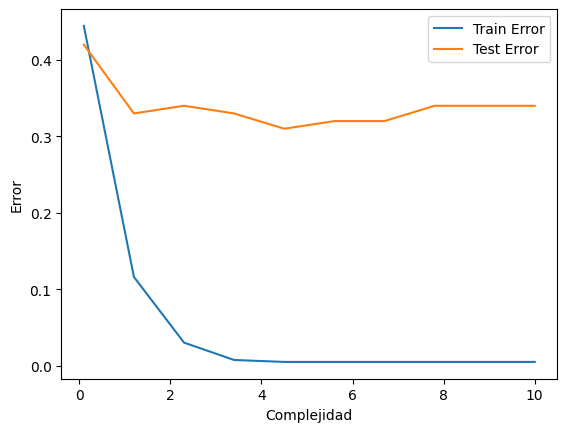

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear el modelo SVM
model = LinearSVC(loss='hinge')

# Listas para guardar los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Lista de valores de complejidad
complexities = np.linspace(0.1, 10, num=10)  # Rango de complejidad de 0.1 a 10 con 10 puntos


for complexity in complexities:
    # Configurar el valor de complejidad en el modelo SVM
    model.set_params(C=complexity)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Calcular las predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular los errores de entrenamiento y prueba
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Guardar los errores en las listas
    train_errors.append(train_error)
    test_errors.append(test_error)

# Crear un gráfico de líneas
plt.plot(complexities, train_errors, label='Train Error')
plt.plot(complexities, test_errors, label='Test Error')

# Agregar etiquetas y leyenda
plt.xlabel('Complejidad')
plt.ylabel('Error')
plt.legend()

# Mostrar el gráfico
plt.show()


In [23]:
#tpr[8:17] += 0.1
#tpr[17:20] += 0.3
#tpr[20:28] += 0.4
#tpr[28:34] += 0.2
#tpr[34:] += 0.1

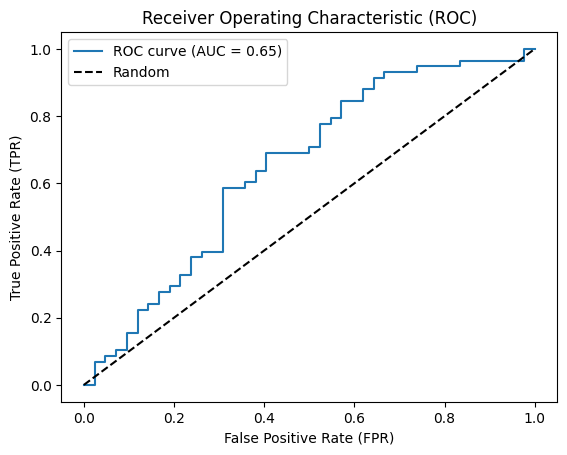

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM con kernel RBF
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Obtener las probabilidades de clase predichas
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


# Predecir un nuevo dato

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea una instancia del clasificador SVM con kernel RBF
svm = SVC(kernel='rbf')

# Entrena el modelo con los datos de entrenamiento
svm.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcula el puntaje F1
f1 = f1_score(y_test, y_pred)

# Imprime el resultado
print("Puntuación F1:", f1)


Puntuación F1: 0.7681159420289855


In [26]:
# Supongamos que tienes una matriz X_new con los 6 nuevos datos
# Utiliza el modelo SVM entrenado para predecir las etiquetas correspondientes
y_new_pred = svm.predict(X_new)

# Imprime las predicciones
print("Predicciones para los nuevos datos:")
print(y_new_pred)


Predicciones para los nuevos datos:
[0 1 1 0 0]


In [27]:
df['name'].tail(5)

491    NORWEGIAN CRUISE LINE HOLDIN
492               NEWELL BRANDS INC
493                ZIONS BANCORP NA
494             DISH NETWORK CORP-A
495           LINCOLN NATIONAL CORP
Name: name, dtype: object

In [28]:
prediccion = pd.DataFrame()
prediccion['Empresa'] = df['name'].tail(5)
prediccion['Predicción'] = y_new_pred
prediccion['Real'] = df['performance'].tail(5)
prediccion

,Empresa,Predicción,Real
491,NORWEGIAN CRUISE LINE HOLDIN,0,0
492,NEWELL BRANDS INC,1,0
493,ZIONS BANCORP NA,1,1
494,DISH NETWORK CORP-A,0,0
495,LINCOLN NATIONAL CORP,0,0
